In [5]:
pip install tensorflow



  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.12.2
    Uninstalling typing-extensions-4.12.2:
      Successfully uninstalled typing-extensions-4.12.2


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account al

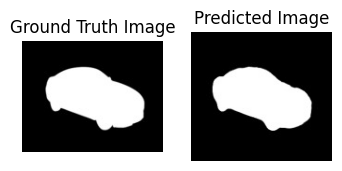

In [18]:
import cv2
import matplotlib.pyplot as plt

# Read images
gt = cv2.imread("GT.jpg")
pred = cv2.imread("PREDICTED.jpg")

# Convert images from BGR (OpenCV default) to RGB
gt_rgb = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
pred_rgb = cv2.cvtColor(pred, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(4, 4))

# Display Ground Truth
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb)
plt.title("Ground Truth Image")
plt.axis('off')

# Display Predicted Image
plt.subplot(1, 2, 2)
plt.imshow(pred_rgb)
plt.title("Predicted Image")
plt.axis('off')

plt.show()


## Using NumPy

In [19]:
import cv2
import numpy as np

def compute_iou_numpy(gt_path, pred_path):
    """
    Compute IoU between two images using NumPy, ensuring they have the same size.
    
    Args:
        gt_path (str): Path to ground truth image (GT.jpg)
        pred_path (str): Path to predicted image (PREDICTED.jpg)

    Returns:
        float: IoU value
    """
    # Read images in grayscale
    gt = cv2.imread(gt_path, 0)  # Ground truth
    pred = cv2.imread(pred_path, 0)  # Predicted

    # Resize predicted image to match GT dimensions
    pred_resized = cv2.resize(pred, (gt.shape[1], gt.shape[0]))  # Resize to (width, height)

    # Thresholding to get binary masks (assumes objects are white on black background)
    _, gt_bin = cv2.threshold(gt, 150, 255, cv2.THRESH_BINARY)
    _, pred_bin = cv2.threshold(pred_resized, 150, 255, cv2.THRESH_BINARY)

    # Convert to boolean arrays
    gt_bool = gt_bin > 0
    pred_bool = pred_bin > 0

    # Compute Intersection and Union
    intersection = np.logical_and(gt_bool, pred_bool)
    union = np.logical_or(gt_bool, pred_bool)

    # Compute IoU
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) > 0 else 0
    return iou

# Example usage:
iou_value = compute_iou_numpy("GT.jpg", "PREDICTED.jpg")
print(f"IoU (NumPy): {iou_value:.4f}")


IoU (NumPy): 0.8403


## Using PyTorch

In [21]:
import torch
import cv2

def compute_iou_torch(gt_path, pred_path):
    """
    Compute IoU between two images using PyTorch.

    Args:
        gt_path (str): Path to ground truth image (GT.jpg)
        pred_path (str): Path to predicted image (PREDICTED.jpg)

    Returns:
        float: IoU value
    """
    # Read images in grayscale
    gt = cv2.imread(gt_path, 0)
    pred = cv2.imread(pred_path, 0)
    
    pred_resized = cv2.resize(pred, (gt.shape[1], gt.shape[0]))  # Resize predicted to match GT

    # Convert to PyTorch tensors
    gt_tensor = torch.tensor(gt, dtype=torch.float32) / 255.0
    pred_tensor = torch.tensor(pred_resized, dtype=torch.float32) / 255.0

    # Thresholding
    gt_bin = gt_tensor > 0.5
    pred_bin = pred_tensor > 0.5

    # Compute Intersection and Union
    intersection = torch.logical_and(gt_bin, pred_bin).sum().float()
    union = torch.logical_or(gt_bin, pred_bin).sum().float()

    # Compute IoU
    iou = intersection / union if union > 0 else torch.tensor(0.0)
    return iou.item()

# Example usage:
iou_value = compute_iou_torch("GT.jpg", "PREDICTED.jpg")
print(f"IoU (PyTorch): {iou_value:.4f}")


IoU (PyTorch): 0.8427


# Using TensorFlow

In [6]:
import tensorflow as tf
import cv2

def compute_iou_tensorflow(gt_path, pred_path):
    """
    Compute IoU between two images using TensorFlow.

    Args:
        gt_path (str): Path to ground truth image (GT.jpg)
        pred_path (str): Path to predicted image (PREDICTED.jpg)

    Returns:
        float: IoU value
    """
    # Read images in grayscale
    gt = cv2.imread(gt_path, 0)
    pred = cv2.imread(pred_path, 0)
    
    pred_resized = cv2.resize(pred, (gt.shape[1], gt.shape[0]))  # Resize predicted to match GT

    # Convert to TensorFlow tensors
    gt_tensor = tf.cast(gt, dtype=tf.float32) / 255.0
    pred_tensor = tf.cast(pred_resized, dtype=tf.float32) / 255.0

    # Thresholding
    gt_bin = gt_tensor > 0.5
    pred_bin = pred_tensor > 0.5

    # Compute Intersection and Union
    intersection = tf.reduce_sum(tf.cast(tf.logical_and(gt_bin, pred_bin), tf.float32))
    union = tf.reduce_sum(tf.cast(tf.logical_or(gt_bin, pred_bin), tf.float32))

    # Compute IoU
    iou = intersection / union if union > 0 else tf.constant(0.0)
    return iou.numpy()

# Example usage:
iou_value = compute_iou_tensorflow("GT.jpg", "PREDICTED.jpg")
print(f"IoU (TensorFlow): {iou_value:.4f}")


IoU (TensorFlow): 0.8427


## Import Metrics



In [ ]:
import torch
import torchmetrics

# Initialize IoU metric
iou_metric = torchmetrics.JaccardIndex(num_classes=2)

# Compute IoU
iou_value = iou_metric(pred_tensor.unsqueeze(0), gt_tensor.unsqueeze(0))

'''
The unsqueeze(0) is used to add an extra dimension for batch 
size as torchmetrics expects input tensors with the shape 
[batch_size, channels, height, width].
'''

In [ ]:
import tensorflow as tf

# Initialize MeanIoU metric
iou_metric = tf.keras.metrics.MeanIoU(num_classes=2)

# Update the metric with the ground truth and prediction
iou_metric.update_state(gt_tensor, pred_tensor)

# Get the IoU value
iou_value = iou_metric.result().numpy()